In [ ]:
# Common Data Errors Examples

# 1. Missing Data:
# Task 1: Review a dataset where some customer emails are missing. Identify how
# many records are incomplete.
# Task 2: Examine a sales dataset with missing transaction dates and determine the
# percentage of missing data.
# Task 3: Identify missing department information in an employee registry.






# 2. Duplicate Data:
# Task 1: Analyze a customer dataset with duplicate entries and count the number of
# duplicates.
# Task 2: Review supplier data and identify any repeated supplier names.
# Task 3: Examine a product inventory list for duplicates in product IDs.






# 3. Inconsistent Formatting:
# Task 1: Spot inconsistencies in date formats (e.g., DD/MM/YYYY vs. MM/DD/YYYY)
# in a dataset.
# Task 2: Identify phone numbers with varying formats in a contact list.
# Task 3: Review address data for discrepancies in state abbreviations (e.g., CA vs.
# Calif.).





# 4. Data Drift:
# Task 1: Compare monthly revenues over six months to identify data drift.
# Task 2: Analyze user engagement metrics from a web application over different
# quarters.
# Task 3: Review a stock price dataset to detect any anomalies over a year.





=== 1. Missing Data ===
Task 1: Number of records with missing customer emails: 2
Task 2: Percentage of missing transaction dates: 50.00%
Task 3: Number of employees with missing department info: 2


=== 2. Duplicate Data ===
Task 1: Number of duplicate customer records: 3
Task 2: Repeated supplier names:
['Acme Corp']
Task 3: Duplicate product IDs:
['P002' 'P001']


=== 3. Inconsistent Formatting ===
Task 1: Dates with inconsistent/unparseable formats:
Series([], dtype: object)
Task 2: Normalized phone numbers:
0     1234567890
1     1234567890
2     1234567890
3    11234567890
dtype: object
Task 3: Standardized addresses:
0     123 Main St, Los Angeles, CA
1    456 Elm St, San Francisco, CA
2        789 Oak St, San Diego, CA
3      101 Pine St, Sacramento, CA
dtype: object


=== 4. Data Drift ===
Task 1: Monthly revenue percentage changes:
0     5.000000
1    -1.666667
2     1.818182
3    15.384615
4    28.000000
5    21.428571
dtype: float64
Mean revenue difference: 1500.0


/tmp/ipykernel_36408/2667507580.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['transaction_date'].replace('', np.nan, inplace=True)


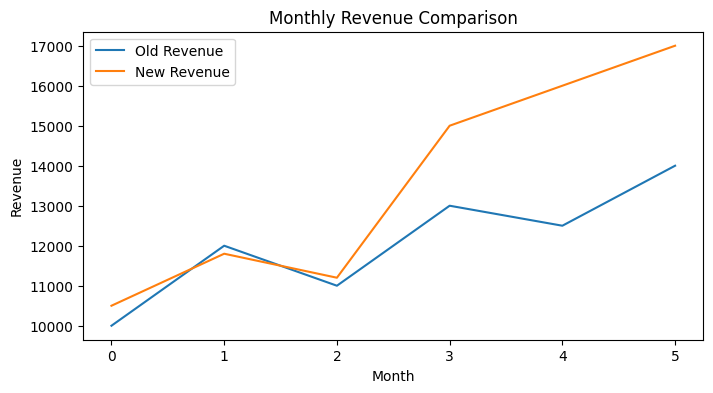

Task 2: User engagement comparison:
  quarter  active_users  avg_session_time
0      Q1          1000               5.5
1      Q2          1200               5.8
2      Q3          1100               5.2
3      Q4          1300               5.1
Task 3: Detected anomalies in stock prices:
3    150
dtype: int64


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Missing Data
# ---------------------------

print("=== 1. Missing Data ===")

# Sample dataset for customer emails (Task 1)
customer_data = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'email': ['alice@example.com', None, 'charlie@example.com', '', 'eve@example.com']
})

# Task 1: Count incomplete records (missing emails)
# Consider None or empty string as missing
customer_data['email_missing'] = customer_data['email'].isnull() | (customer_data['email'].str.strip() == '')
num_incomplete = customer_data['email_missing'].sum()
print(f"Task 1: Number of records with missing customer emails: {num_incomplete}")

# Sample sales dataset with missing transaction dates (Task 2)
sales_data = pd.DataFrame({
    'transaction_id': [101, 102, 103, 104],
    'transaction_date': ['2025-01-10', None, '2025-01-12', '']
})

# Convert empty strings to NaN for consistency
sales_data['transaction_date'].replace('', np.nan, inplace=True)

# Task 2: Percentage of missing transaction dates
missing_dates_pct = sales_data['transaction_date'].isnull().mean() * 100
print(f"Task 2: Percentage of missing transaction dates: {missing_dates_pct:.2f}%")

# Sample employee registry with missing department info (Task 3)
employee_data = pd.DataFrame({
    'employee_id': [1001, 1002, 1003, 1004],
    'department': ['HR', None, 'Finance', '']
})

employee_data['department_missing'] = employee_data['department'].isnull() | (employee_data['department'].str.strip() == '')
num_missing_dept = employee_data['department_missing'].sum()
print(f"Task 3: Number of employees with missing department info: {num_missing_dept}")

print("\n")

# ---------------------------
# 2. Duplicate Data
# ---------------------------

print("=== 2. Duplicate Data ===")

# Sample customer dataset with duplicates (Task 1)
customers = pd.DataFrame({
    'customer_id': [1, 2, 2, 3, 4, 4, 4],
    'name': ['Alice', 'Bob', 'Bob', 'Charlie', 'David', 'David', 'David']
})

# Task 1: Count duplicate entries (based on customer_id and name)
duplicates_count = customers.duplicated(subset=['customer_id', 'name']).sum()
print(f"Task 1: Number of duplicate customer records: {duplicates_count}")

# Sample supplier data with repeated supplier names (Task 2)
suppliers = pd.DataFrame({
    'supplier_id': [201, 202, 203, 204],
    'supplier_name': ['Acme Corp', 'Beta Ltd', 'Acme Corp', 'Delta Inc']
})

# Task 2: Identify repeated supplier names
repeated_suppliers = suppliers['supplier_name'][suppliers['supplier_name'].duplicated()]
print(f"Task 2: Repeated supplier names:\n{repeated_suppliers.unique()}")

# Sample product inventory with duplicate product IDs (Task 3)
inventory = pd.DataFrame({
    'product_id': ['P001', 'P002', 'P003', 'P002', 'P004', 'P001'],
    'product_name': ['Widget', 'Gadget', 'Thing', 'Gadget', 'Doohickey', 'Widget']
})

# Task 3: Find duplicate product IDs
duplicate_product_ids = inventory['product_id'][inventory['product_id'].duplicated()]
print(f"Task 3: Duplicate product IDs:\n{duplicate_product_ids.unique()}")

print("\n")

# ---------------------------
# 3. Inconsistent Formatting
# ---------------------------

print("=== 3. Inconsistent Formatting ===")

# Sample dataset with inconsistent date formats (Task 1)
dates = pd.Series(['12/31/2024', '31/12/2024', '01/15/2025', '15/01/2025'])

# Task 1: Detect inconsistent date formats
def detect_date_format(date_str):
    for fmt in ("%m/%d/%Y", "%d/%m/%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return None

parsed_dates = dates.apply(detect_date_format)
inconsistent_dates = parsed_dates.isnull()
print(f"Task 1: Dates with inconsistent/unparseable formats:\n{dates[inconsistent_dates]}")

# Sample phone numbers with varying formats (Task 2)
phone_numbers = pd.Series([
    '123-456-7890',
    '(123) 456-7890',
    '1234567890',
    '+1 123 456 7890'
])

# Task 2: Normalize phone numbers to digits only and identify inconsistent formats
normalized_phones = phone_numbers.str.replace(r'\D', '', regex=True)
print("Task 2: Normalized phone numbers:")
print(normalized_phones)

# Sample addresses with inconsistent state abbreviations (Task 3)
addresses = pd.Series([
    '123 Main St, Los Angeles, CA',
    '456 Elm St, San Francisco, Calif.',
    '789 Oak St, San Diego, CA',
    '101 Pine St, Sacramento, Calif'
])

# Task 3: Identify inconsistent state abbreviations
def standardize_state(addr):
    if 'Calif' in addr:
        return addr.replace('Calif.', 'CA').replace('Calif', 'CA')
    return addr

standardized_addresses = addresses.apply(standardize_state)
print("Task 3: Standardized addresses:")
print(standardized_addresses)

print("\n")

# ---------------------------
# 4. Data Drift
# ---------------------------

print("=== 4. Data Drift ===")

# Task 1: Compare monthly revenues over six months
monthly_revenue_old = pd.Series([10000, 12000, 11000, 13000, 12500, 14000])
monthly_revenue_new = pd.Series([10500, 11800, 11200, 15000, 16000, 17000])

# Simple drift detection: percentage change month-over-month and overall mean difference
pct_change = ((monthly_revenue_new - monthly_revenue_old) / monthly_revenue_old) * 100
mean_diff = monthly_revenue_new.mean() - monthly_revenue_old.mean()

print(f"Task 1: Monthly revenue percentage changes:\n{pct_change}")
print(f"Mean revenue difference: {mean_diff}")

plt.figure(figsize=(8,4))
plt.plot(monthly_revenue_old, label='Old Revenue')
plt.plot(monthly_revenue_new, label='New Revenue')
plt.title('Monthly Revenue Comparison')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Task 2: Analyze user engagement metrics over quarters
engagement_old = pd.DataFrame({
    'quarter': ['Q1', 'Q2'],
    'active_users': [1000, 1200],
    'avg_session_time': [5.5, 5.8]
})
engagement_new = pd.DataFrame({
    'quarter': ['Q3', 'Q4'],
    'active_users': [1100, 1300],
    'avg_session_time': [5.2, 5.1]
})

print("Task 2: User engagement comparison:")
print(pd.concat([engagement_old, engagement_new], ignore_index=True))

# Task 3: Review stock price dataset for anomalies (using z-score)
stock_prices = pd.Series([100, 102, 101, 150, 99, 98, 97])  # 150 is an anomaly

z_scores = (stock_prices - stock_prices.mean()) / stock_prices.std()
anomalies = stock_prices[np.abs(z_scores) > 2]

print(f"Task 3: Detected anomalies in stock prices:\n{anomalies}")
